In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Loading the training and testing data into data frames
training_set = pd.read_csv("Training_set.csv")
testing_set = pd.read_csv("Testing_set.csv")

In [3]:
training_set

filename               label
0          Image_1.jpg             sitting
1          Image_2.jpg        using_laptop
2          Image_3.jpg             hugging
3          Image_4.jpg            sleeping
4          Image_5.jpg        using_laptop
...                ...                 ...
12595  Image_12596.jpg             sitting
12596  Image_12597.jpg            clapping
12597  Image_12598.jpg             sitting
12598  Image_12599.jpg             dancing
12599  Image_12600.jpg  listening_to_music

[12600 rows x 2 columns]

In [4]:
training_set.dtypes

filename    object
label       object
dtype: object

In [5]:
training_set.isnull().sum()

filename    0
label       0
dtype: int64

In [6]:
testing_set

filename
0        Image_1.jpg
1        Image_2.jpg
2        Image_3.jpg
3        Image_4.jpg
4        Image_5.jpg
...              ...
5395  Image_5396.jpg
5396  Image_5397.jpg
5397  Image_5398.jpg
5398  Image_5399.jpg
5399  Image_5400.jpg

[5400 rows x 1 columns]

C:\Users\gbouaziz\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

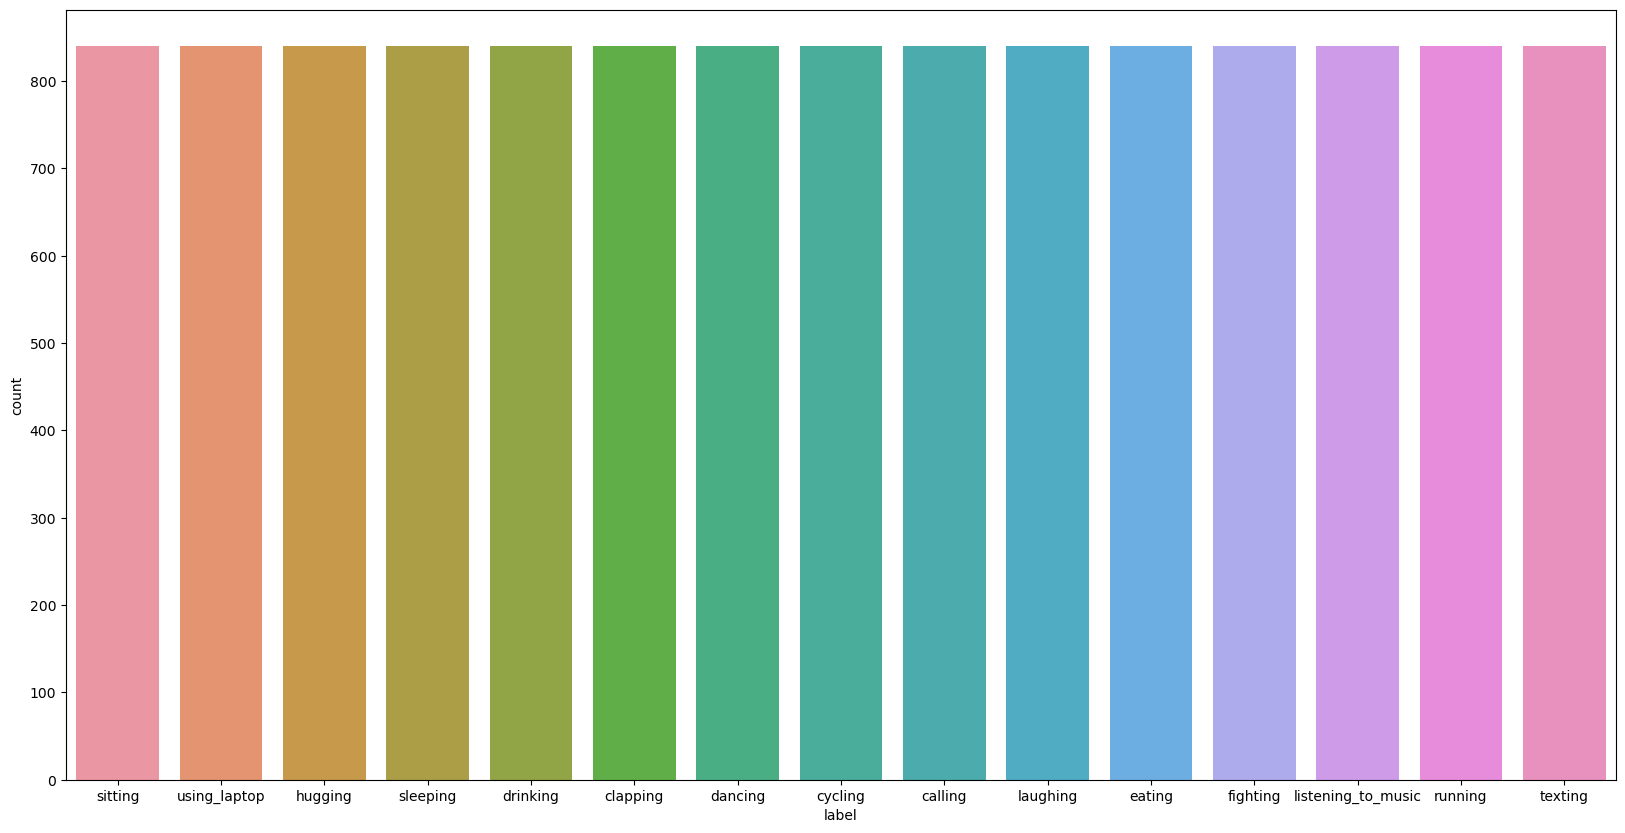

In [7]:
# Plotting the data distribution across the 15 classes in the training set

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(training_set.label)

In [8]:
counts = training_set['label'].value_counts()
print(counts)

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64


In [9]:
# Loading the training set images into an array
# Decided to load the images in as 150 x 150 pixels arbitrarily

from tensorflow.keras.preprocessing.image import img_to_array, load_img

img_data = []
img_label = []

for i in range(len(training_set)):
    img = "train/" + training_set["filename"][i]
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img_data.append(img)
    img_label.append(training_set["label"][i])

In [10]:
img_data = np.array(img_data)
print(img_data.shape)

(12600, 150, 150, 3)


In [11]:
img_label = np.array(img_label)
print(img_label.shape)

(12600,)


In [12]:
# Define a function to randomly display training set images
# Code from https://www.kaggle.com/code/yohansandun/assignment-2-10?kernelSessionId=99056331

import random
from matplotlib import image as img

def display_random(n=1):
    plt.figure(figsize=(15, 20))
    for i in range(n):
        rnd = random.randint(0, len(training_set)-1)
        img_file = 'train/' + training_set['filename'][rnd]

        if os.path.exists(img_file):
            plt.subplot(n//2+1, 2, i + 1)
            image = img.imread(img_file)
            plt.imshow(image)
            plt.title(training_set['label'][rnd])

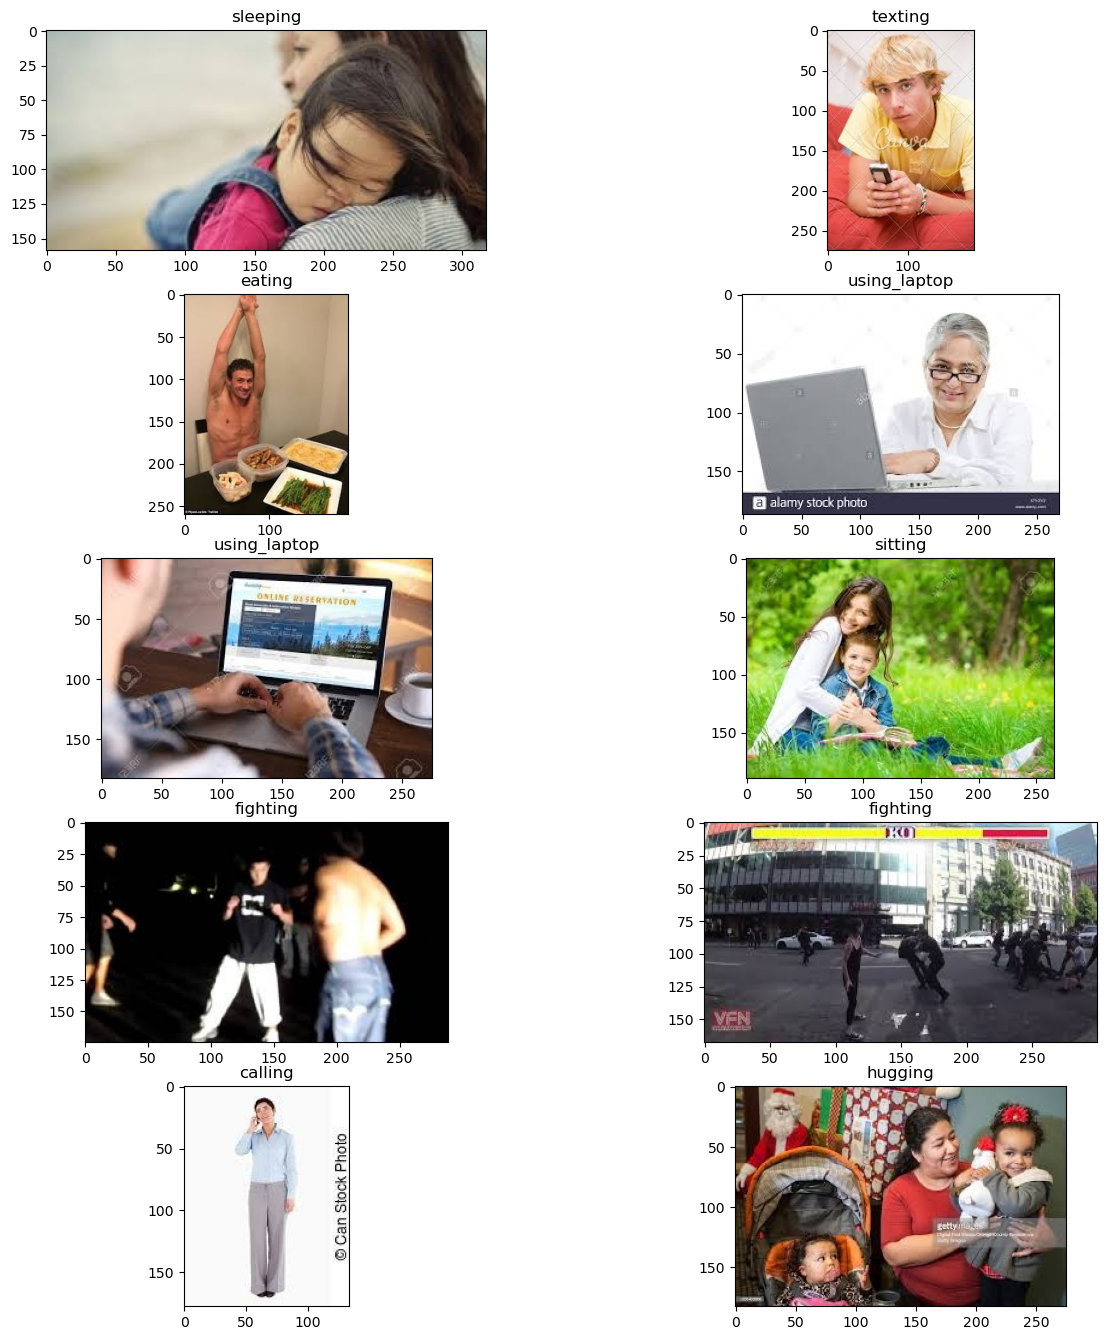

In [13]:
display_random(10)

In [14]:
# imports
import os
import glob
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split


import cv2
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [15]:
# loading files
train_labels = pd.read_csv("Training_set.csv")
train_images = glob.glob("train/*") 

In [16]:
# pre processing 
def image_preprocessing(image,verbos=False):
    """
        This function encapsulates the entire preprocessing process for one image
        Input:
        - image: the image to be transformed
        Returns:
        - (numpy array): the transformed image  
    """
    if verbos:
        print("shape:{}".format(image.shape))
        print("original:",image[0][:10])
    image.resize((160,160,3), refcheck=False)
    norm_image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) # normalizing the image 
    if verbos:
        print("normalized:",norm_image[0][:10])
    return norm_image

# creating dataset
# First we one hot encode the labels 
y = pd.get_dummies(train_labels.label).to_numpy()

# now lets create X
X = []
for i in range(len(train_labels)):
    fp = 'train/' + train_labels['filename'].iloc[i]    
    image = cv2.imread(fp)
    res_img = image_preprocessing(image)
    X.append(res_img)

In [17]:
X = np.asarray(X)
print("x shape:{}, y shape:{}".format(X.shape,y.shape))

x shape:(12600, 160, 160, 3), y shape:(12600, 15)


In [18]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42,stratify=train_labels.label)

(12600, 160, 160, 3) (12600, 15)


In [19]:
# deleting to free up RAM
del train_labels,train_images,X,y

In [20]:
print("X_train:{} \ny_train:{}".format(X_train.shape,y_train.shape))
print("X_test:{} \ny_test:{}".format(X_test.shape,y_test.shape))

X_train:(8442, 160, 160, 3) 
y_train:(8442, 15)
X_test:(4158, 160, 160, 3) 
y_test:(4158, 15)


In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.3) and (logs.get('accuracy') > 0.8):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [22]:
model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 15)                7695      
                                                                 
Total params: 15,247,695
Trainable params: 533,007
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
history = model.fit(X_train,y_train,epochs=100, callbacks=[callbacks])

Epoch 1/100
264/264 [==============================] - 398s 2s/step - loss: 1.6777 - accuracy: 0.4408
Epoch 2/100
264/264 [==============================] - 407s 2s/step - loss: 1.6627 - accuracy: 0.4460
Epoch 3/100
264/264 [==============================] - 409s 2s/step - loss: 1.6439 - accuracy: 0.4532
Epoch 4/100
264/264 [==============================] - 404s 2s/step - loss: 1.6307 - accuracy: 0.4538
Epoch 5/100
264/264 [==============================] - 402s 2s/step - loss: 1.6149 - accuracy: 0.4619
Epoch 6/100
264/264 [==============================] - 395s 1s/step - loss: 1.5946 - accuracy: 0.4693
Epoch 7/100
264/264 [==============================] - 396s 2s/step - loss: 1.5763 - accuracy: 0.4707
Epoch 8/100
264/264 [==============================] - 396s 1s/step - loss: 1.5605 - accuracy: 0.4803
Epoch 9/100
264/264 [==============================] - 395s 1s/step - loss: 1.5478 - accuracy: 0.4848
Epoch 10/100
264/264 [==============================] - 395s 1s/step - loss: 1.527

264/264 [==============================] - 396s 1s/step - loss: 0.6308 - accuracy: 0.8195
Epoch 81/100
264/264 [==============================] - 395s 1s/step - loss: 0.6135 - accuracy: 0.8229
Epoch 82/100
264/264 [==============================] - 394s 1s/step - loss: 0.6027 - accuracy: 0.8284
Epoch 83/100
264/264 [==============================] - 395s 1s/step - loss: 0.5977 - accuracy: 0.8267
Epoch 84/100
264/264 [==============================] - 394s 1s/step - loss: 0.5784 - accuracy: 0.8358
Epoch 85/100
264/264 [==============================] - 395s 1s/step - loss: 0.5820 - accuracy: 0.8355
Epoch 86/100
264/264 [==============================] - 394s 1s/step - loss: 0.5720 - accuracy: 0.8369
Epoch 87/100
264/264 [==============================] - 395s 1s/step - loss: 0.5635 - accuracy: 0.8400
Epoch 88/100
264/264 [==============================] - 396s 2s/step - loss: 0.5553 - accuracy: 0.8441
Epoch 89/100
264/264 [==============================] - 395s 1s/step - loss: 0.5456 - 

In [27]:
# saving weights
model.save_weights("VGG16_model.h5")

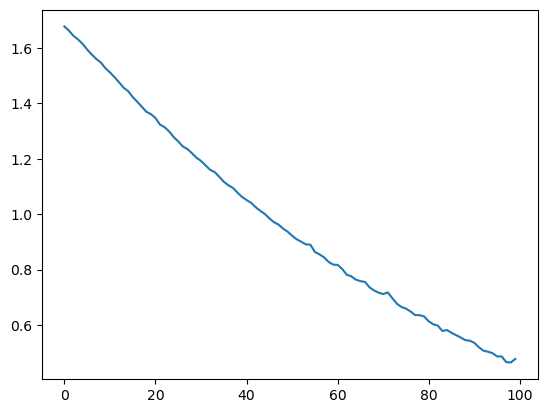

In [28]:
plt.plot(history.history['loss'])

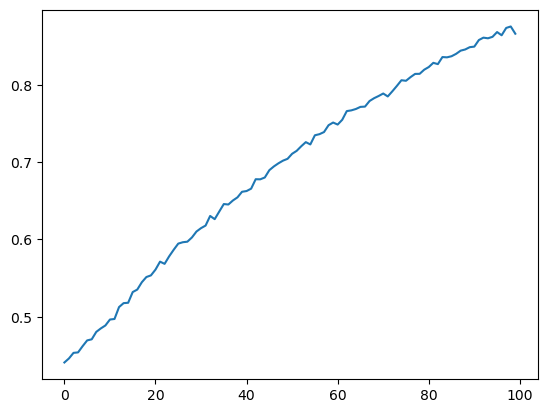

In [29]:
plt.plot(history.history['accuracy'])

<AxesSubplot:>

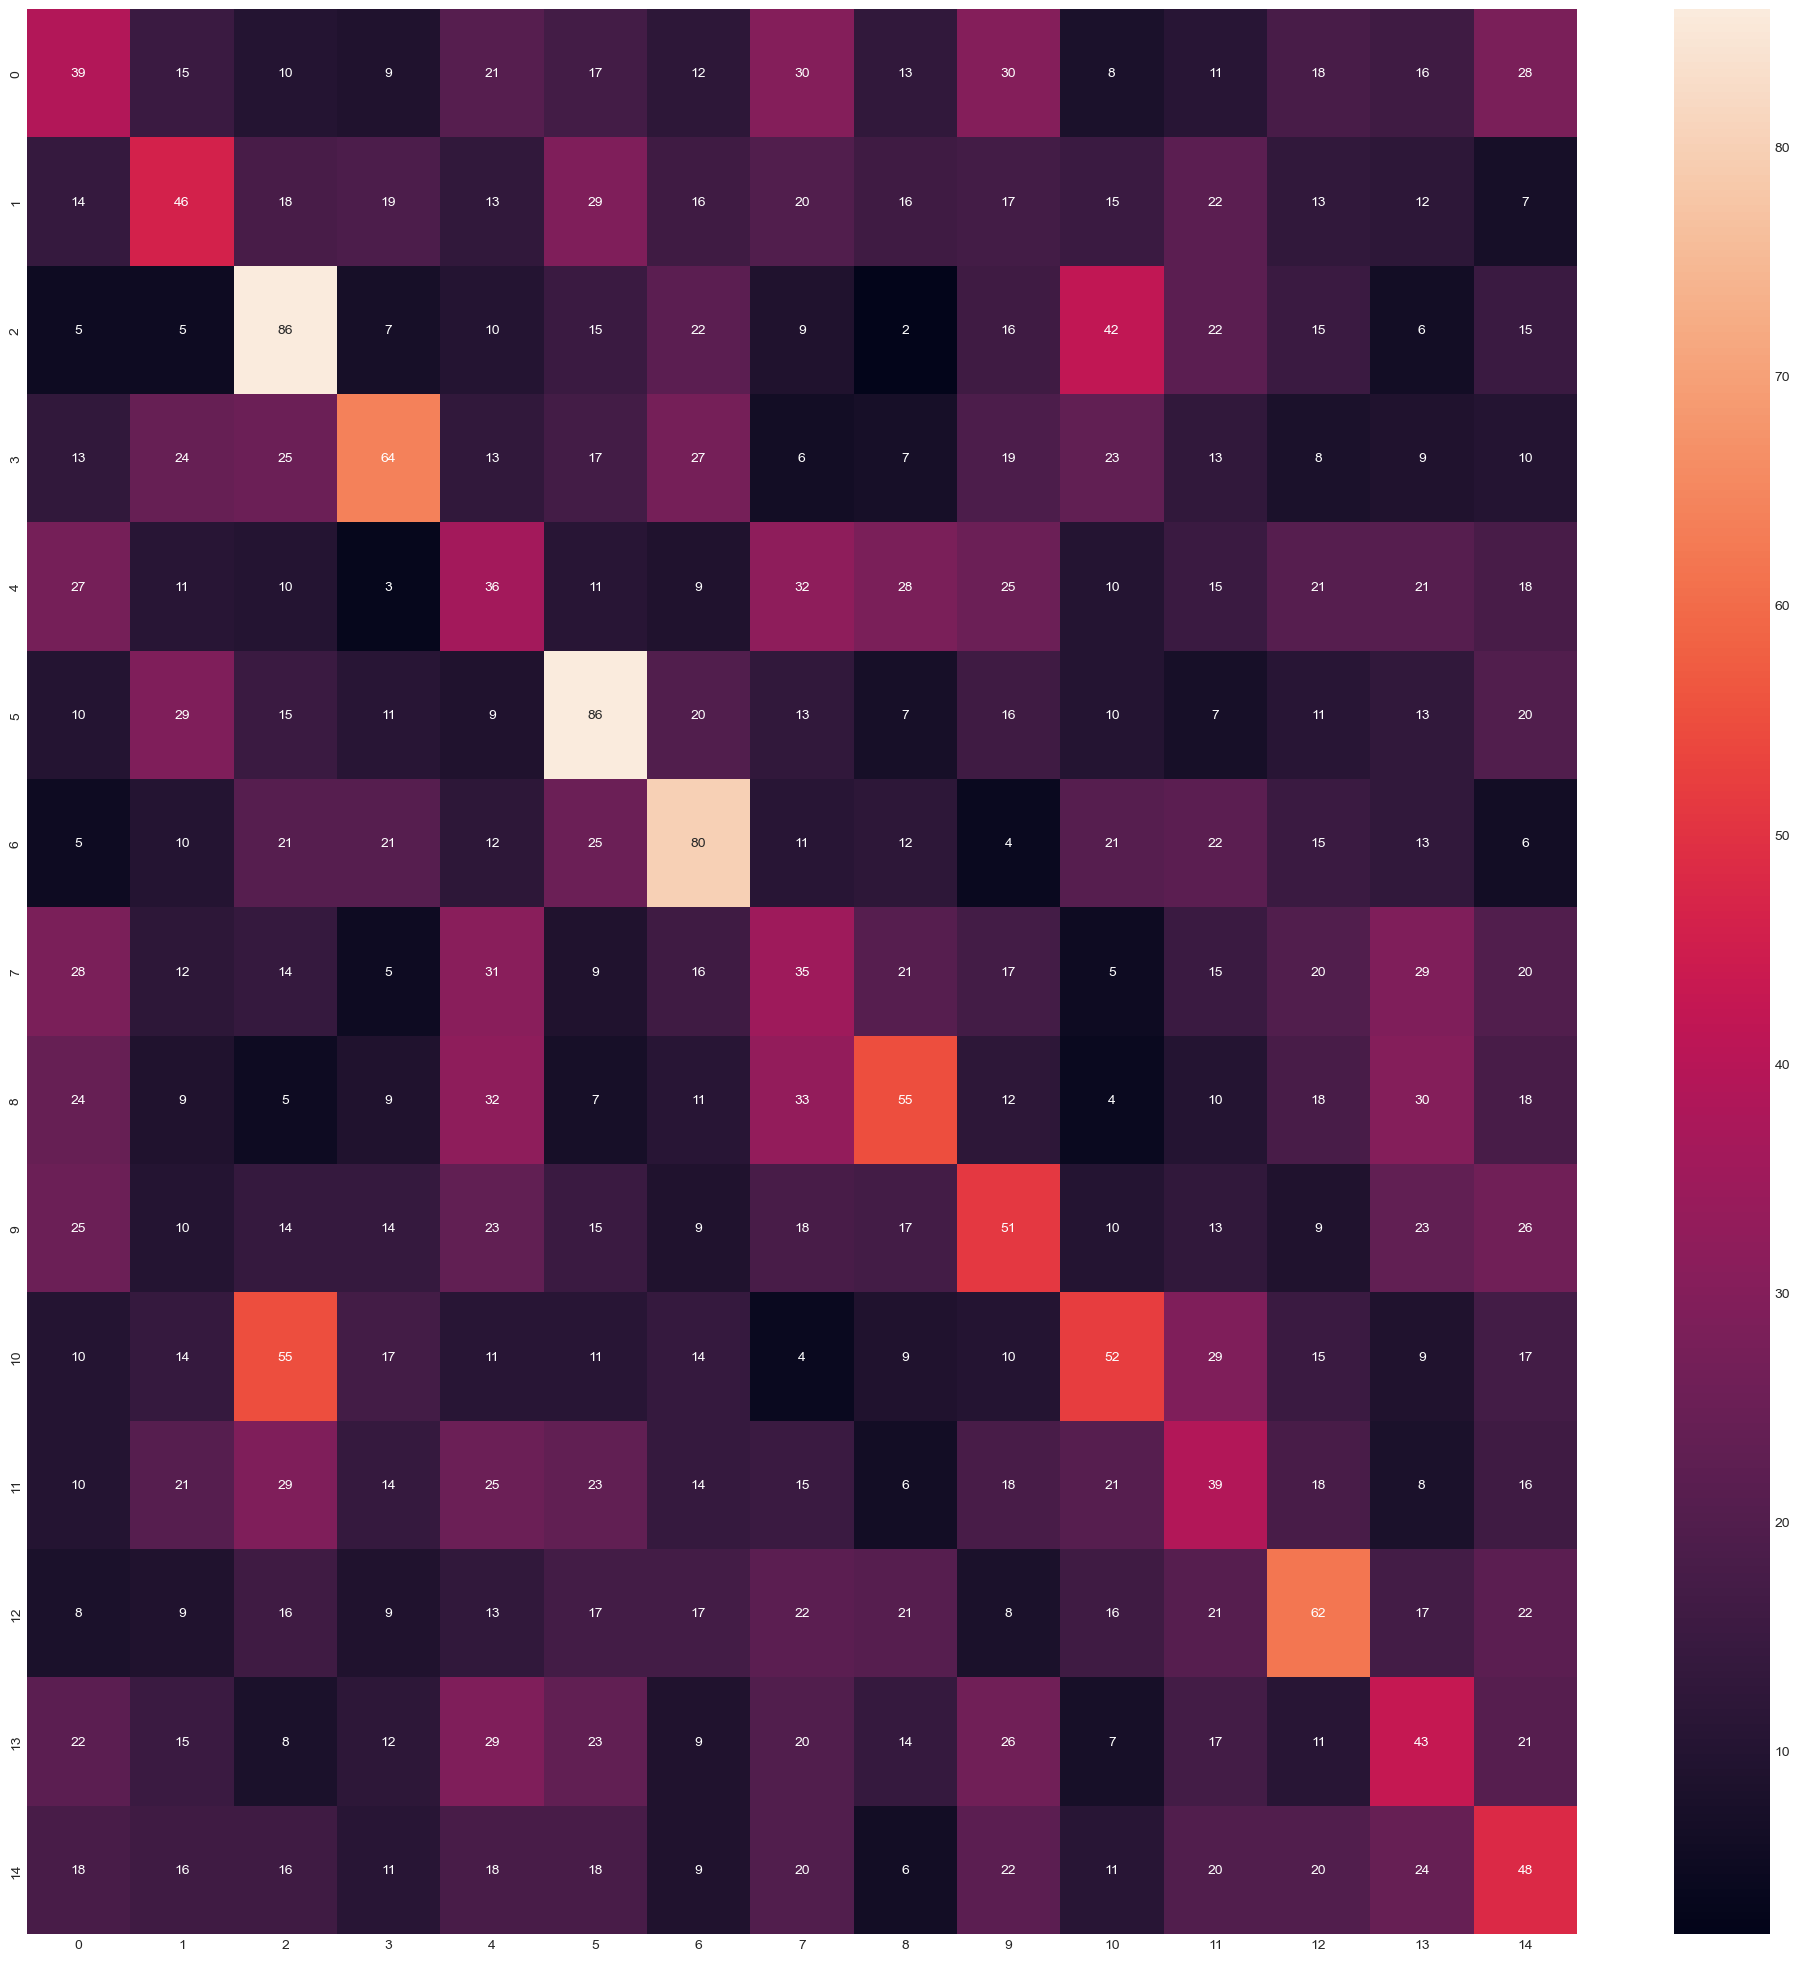

In [35]:
from sklearn.metrics import confusion_matrix

prediction = model.predict(X_test, batch_size=10,  verbose=0 )
predicted_classes = np.argmax(prediction, axis=1)
y_true = np.argmax(y_test, axis=1)
import seaborn as sns
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [39]:
import plotly.express as px
l = training_set.label.value_counts()
fig = px.pie(training_set, values=l.values, names=l.index, title='Distribution of Human Activity')
fig.show()